In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
# from VnPost.Server.utils.inference import OCR_server_pipeline
from VnPost.Server.utils.inference_obb import OCR_server_pipeline
import os

/home/hai/anaconda3/envs/ocr/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = "/mnt/d/VNPost/Mail_OCR/weights"

yolo_det_path = os.path.join(model_path, "yolo/det/yolo_detect_addr.pt")
yolo_seg_path = os.path.join(model_path, "yolo/seg/yolo_segment.pt")
paddle_doc_cls_path = os.path.join(model_path, "doc_cls")
paddle_config_path = "/mnt/d/VNPost/Mail_OCR/OCR.yaml"

OCR = OCR_server_pipeline(
    yolo_det_path = yolo_det_path,
    yolo_seg_path = yolo_seg_path,
    paddle_doc_cls_path = paddle_doc_cls_path,
    paddle_config = paddle_config_path,
    device="cuda"
)

/home/hai/anaconda3/envs/ocr/lib/python3.9/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_mobile_det', None)
Using official model (PP-OCRv5_mobile_det), the model files will be automatically downloaded and saved in /home/hai/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 14970.75it/s]
Creating model: ('PP-OCRv5_mobile_rec', '/mnt/d/VNPost/Mail_OCR/weights/rec_hand/inference')


In [ ]:
# image = cv.imread("/mnt/d/VNPost/raw data/data_thu/2670.jpg")

image = plt.imread("/mnt/d/VNPost/raw data/address_images/4673.jpg")

result, sentence = OCR.ocr(image)


0: 96x320 1 thu, 49.8ms
Speed: 4.8ms preprocess, 49.8ms inference, 12.8ms postprocess per image at shape (1, 3, 96, 320)

0: 96x320 1 AddressOnLetter, 42.0ms
Speed: 1.2ms preprocess, 42.0ms inference, 9.2ms postprocess per image at shape (1, 3, 96, 320)


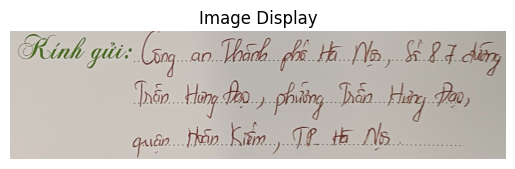

Kính gửi: Công an Thành phố Hà Nội, số 87 đờng
Trần Hưng Đạo, phường Trần Hưng Đạo,
quận Hoàn Kiếm, TP Hà Nội


Kính gửi: Công an Thành phố Hà Nội, số 87 đờng Trần Hưng Đạo, phường Trần Hưng Đạo, quận Hoàn Kiếm, TP Hà Nội  


In [36]:
plt.imshow(result)
plt.axis('off')  # hide axes
plt.title("Image Display")
plt.show()

final_sen = ""
for sen in sentence:
    print(sen)
    final_sen += sen+" "

print()
print(final_sen)